In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#pd.set_option('display.precision', 3)
pd.options.display.float_format = '{:.2f}'.format
sns.despine(left=True);

<Figure size 432x288 with 0 Axes>

In [9]:
df=pd.read_feather('dubai_TMC.feather')
df.head(3)

,TMC,EPOCH-5MIN,LENGTH,FREEFLOW,SPDLIMIT,COUNT,MEAN,STDDEV,MIN,MAX,CONFIDENCE,PCT-50,PCT-90,GAPFILL,DateTime
0,D19N00069,0,6586,118.10,120.00,55,121.40,8.80,104,130,40,126,130,N,2019-02-02 00:00:00
1,D19N00069,1,6586,118.10,120.00,26,108.10,7.90,100,125,40,104,125,N,2019-02-02 00:05:00
2,D19N00069,2,6586,118.10,120.00,12,130.40,1.40,130,135,40,130,134,N,2019-02-02 00:10:00


In [10]:
print('Total number of records are : ',df.shape[0])
print('Unique TMC Codes in Dubai are : ',df.TMC.nunique())

Total number of records are :  31997952
Unique TMC Codes in Dubai are :  3584


In [11]:
df.columns

Index(['TMC', 'EPOCH-5MIN', 'LENGTH', 'FREEFLOW', 'SPDLIMIT', 'COUNT', 'MEAN',
       'STDDEV', 'MIN', 'MAX', 'CONFIDENCE', 'PCT-50', 'PCT-90', 'GAPFILL',
       'DateTime'],
      dtype='object')

In [5]:
df1=df.iloc[:50000,:]
print(df1.shape)

(50000, 15)


In [12]:
# Display side by side
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

#### Remove Gap Filled Data & TMC Counts > 1000

In [13]:
df1=df[(df.GAPFILL=='N') & (df.CONFIDENCE>=20)]

def percentage(part, whole):
  return 100 * float(part)/float(whole)

print('Percent of Original Data:',percentage(df1.shape[0], df.shape[0]))

Percent of Original Data: 39.794618730598756


In [14]:
df1.TMC.value_counts().describe()

count   3576.00
mean    3560.81
std     2428.08
min        1.00
25%     1404.00
50%     3322.50
75%     5398.00
max     8875.00
Name: TMC, dtype: float64

**Selecting Unique TMC Counts greater than 5000**

In [15]:
ss=df1.TMC.value_counts(ascending=True)
print('No of unique TMCs:',len(ss))
ss=ss[ss>5000]
print('TMCs count greater than threshold:',len(ss))

df1=df1[df1.TMC.isin(ss.index)]
print('Percent of Original Data:',percentage(df1.shape[0], df.shape[0]))

No of unique TMCs: 3576
TMCs count greater than threshold: 1075
Percent of Original Data: 22.159605714765746


In [23]:
print('No of Unique TMC Codes:',df1.TMC.nunique())
display_side_by_side(pd.DataFrame(df1.TMC.value_counts(ascending=True).head()),
                    pd.DataFrame(df1.TMC.value_counts(ascending=True).tail()))

No of Unique TMC Codes: 1075


,TMC
D19P03479,5001
D19P03485,5003
D19P02771,5005
D19N03342,5005
D19P03360,5008
,TMC
D19N00131,8853
D19N00132,8866
D19N00155,8867
D19N00154,8869


In [37]:
gf=df1.TMC.value_counts(ascending=True)
gf[800:900]

D19P08324    7416
D19N00137    7421
D19P00328    7423
D19N00342    7424
D19P03435    7424
D19P03413    7429
D19P00321    7441
D19P00462    7455
D19P03733    7472
D19P00296    7475
D19N00259    7480
D19N06849    7480
D19N00327    7483
D19P00411    7487
D19P03369    7489
D19P00513    7494
D19N00146    7496
D19N00254    7500
D19N03365    7503
D19P03388    7504
D19P00486    7506
D19P03366    7511
D19N00329    7518
D19N03364    7519
D19P00142    7520
D19N01972    7535
D19N00459    7535
D19N03422    7540
D19P00491    7545
D19N03464    7549
             ... 
D19P00988    7779
D19P04291    7783
D19P00158    7798
D19P00330    7801
D19N00266    7813
D19N00160    7827
D19P07916    7827
D19P00440    7833
D19P00162    7841
D19N00296    7854
D19N09680    7878
D19P00267    7884
D19P00248    7885
D19N00163    7892
D19P00450    7896
D19N00263    7901
D19P00984    7905
D19P00084    7957
D19N00264    7963
D19N00449    7973
D19P04338    7980
D19P00258    7982
D19N00257    7996
D19N03432    7997
D19N00253 

In [26]:
#df1.info();

In [ ]:
df2=df1.pivot(index='DateTime',columns='TMC', values='MEAN')

In [37]:
df1.head()

,TMC,EPOCH-5MIN,LENGTH,FREEFLOW,SPDLIMIT,COUNT,MEAN,STDDEV,MIN,MAX,CONFIDENCE,PCT-50,PCT-90,GAPFILL,DateTime
0,D19N00069,0,6586,118.10,120.00,55,121.40,8.80,104,130,40,126,130,N,2019-02-02 00:00:00
1,D19N00069,1,6586,118.10,120.00,26,108.10,7.90,100,125,40,104,125,N,2019-02-02 00:05:00
2,D19N00069,2,6586,118.10,120.00,12,130.40,1.40,130,135,40,130,134,N,2019-02-02 00:10:00
3,D19N00069,3,6586,118.10,120.00,28,130.00,0.00,130,130,40,130,130,N,2019-02-02 00:15:00
4,D19N00069,4,6586,118.10,120.00,50,104.80,12.90,88,125,40,114,119,N,2019-02-02 00:20:00


In [41]:
df1[(df1['DateTime']=='2019-02-02')&(df1['TMC']=='D19N00066')]

,TMC,EPOCH-5MIN,LENGTH,FREEFLOW,SPDLIMIT,COUNT,MEAN,STDDEV,MIN,MAX,CONFIDENCE,PCT-50,PCT-90,GAPFILL,DateTime


In [42]:
df1[df1['TMC']=='D19N00066']

,TMC,EPOCH-5MIN,LENGTH,FREEFLOW,SPDLIMIT,COUNT,MEAN,STDDEV,MIN,MAX,CONFIDENCE,PCT-50,PCT-90,GAPFILL,DateTime
25480514,D19N00066,2,11351,118.90,120.00,10,85.40,6.50,78,96,40,82,96,N,2019-02-02 00:10:00
25480515,D19N00066,3,11351,118.90,120.00,43,82.20,7.80,63,93,40,82,92,N,2019-02-02 00:15:00
25480516,D19N00066,4,11351,118.90,120.00,64,83.50,7.40,69,95,40,83,93,N,2019-02-02 00:20:00
25480517,D19N00066,5,11351,118.90,120.00,66,73.50,12.00,56,104,40,70,89,N,2019-02-02 00:25:00
25480518,D19N00066,6,11351,118.90,120.00,35,98.70,20.60,62,120,40,109,119,N,2019-02-02 00:30:00
25480519,D19N00066,7,11351,118.90,120.00,36,89.10,21.10,52,119,40,91,114,N,2019-02-02 00:35:00
25480520,D19N00066,8,11351,118.90,120.00,36,85.70,24.10,52,124,40,78,117,N,2019-02-02 00:40:00
25480521,D19N00066,9,11351,118.90,120.00,18,81.10,6.00,61,88,40,82,87,N,2019-02-02 00:45:00
25480522,D19N00066,10,11351,118.90,120.00,7,87.60,1.10,85,88,40,88,88,N,2019-02-02 00:50:00
25480523,D19N00066,11,11351,118.90,120.00,29,93.90,8.60,80,123,40,91,100,N,2019-02-02 00:55:00


In [38]:
df2=df1.pivot_table(index='DateTime',columns='TMC',values='MEAN',aggfunc='mean')
df2.head(20)

TMC,D19N00066,D19N00067,D19N00068,D19N00069,D19N00070,D19N00071,D19N00072,D19N00073,D19N00074,D19N00075,...,D19P09627,D19P09666,D19P09668,D19P09670,D19P09672,D19P09674,D19P09676,D19P09677,D19P09680,D19P09681
DateTime,,,,,,,,,,,,,,,,,,,,,
2019-02-02 00:00:00,nan,nan,122.60,121.40,105.60,93.60,115.80,113.50,98.10,111.60,...,90.30,nan,nan,nan,nan,85.50,nan,82.30,nan,nan
2019-02-02 00:05:00,nan,112.30,117.30,108.10,127.40,121.30,123.40,111.00,99.10,84.50,...,84.00,nan,nan,35.70,nan,nan,nan,104.90,nan,nan
2019-02-02 00:10:00,85.40,105.10,121.60,130.40,130.00,121.20,98.50,97.10,102.50,114.30,...,nan,nan,nan,nan,nan,nan,nan,70.30,nan,nan
2019-02-02 00:15:00,82.20,115.00,130.90,130.00,103.60,109.50,106.50,110.50,nan,nan,...,86.70,nan,nan,nan,nan,nan,nan,nan,nan,30.00
2019-02-02 00:20:00,83.50,116.40,127.80,104.80,96.50,77.50,97.10,87.20,87.00,nan,...,114.00,49.30,nan,48.00,nan,nan,nan,nan,67.00,46.90
2019-02-02 00:25:00,73.50,100.70,107.40,85.80,nan,88.40,nan,83.90,89.00,116.00,...,73.30,nan,nan,nan,57.00,nan,69.50,nan,nan,nan
2019-02-02 00:30:00,98.70,90.30,90.60,nan,nan,98.10,110.00,97.50,98.20,113.50,...,nan,nan,nan,nan,nan,nan,nan,108.20,nan,73.40
2019-02-02 00:35:00,89.10,83.40,nan,109.00,109.10,110.10,nan,103.00,92.40,108.90,...,nan,nan,nan,nan,nan,nan,28.00,nan,70.70,68.10
2019-02-02 00:40:00,85.70,nan,110.60,105.50,nan,120.00,107.10,103.10,103.80,nan,...,79.20,nan,nan,nan,nan,nan,95.00,nan,nan,65.00


In [43]:
#dfc=df2.corr
#dfc.to_excel('corr.xlsx')
dfc

TMC,D19N00066,D19N00067,D19N00068,D19N00069,D19N00070,D19N00071,D19N00072,D19N00073,D19N00074,D19N00075,...,D19P09627,D19P09666,D19P09668,D19P09670,D19P09672,D19P09674,D19P09676,D19P09677,D19P09680,D19P09681
TMC,,,,,,,,,,,,,,,,,,,,,
D19N00066,1.00,0.45,0.14,0.07,0.05,0.04,0.02,0.05,0.05,0.02,...,0.06,-0.06,-0.02,-0.05,-0.07,-0.05,0.01,0.02,-0.16,-0.12
D19N00067,0.45,1.00,0.52,0.06,0.04,0.05,0.04,0.05,0.06,0.03,...,0.07,-0.04,-0.04,-0.07,-0.05,-0.07,0.03,0.00,-0.12,-0.10
D19N00068,0.14,0.52,1.00,0.41,0.08,0.03,0.02,0.06,0.05,0.04,...,0.06,-0.07,-0.04,-0.05,-0.06,-0.04,0.03,0.01,-0.09,-0.12
D19N00069,0.07,0.06,0.41,1.00,0.49,0.17,0.01,0.04,0.02,0.03,...,0.07,-0.01,-0.01,-0.03,-0.03,-0.02,0.03,-0.01,-0.12,-0.12
D19N00070,0.05,0.04,0.08,0.49,1.00,0.54,0.12,0.09,0.06,0.04,...,-0.00,-0.03,0.04,0.03,-0.00,0.03,-0.01,0.00,-0.08,-0.07
D19N00071,0.04,0.05,0.03,0.17,0.54,1.00,0.58,0.32,0.17,0.07,...,-0.03,-0.02,0.06,0.04,0.02,0.05,-0.01,0.05,-0.04,-0.05
D19N00072,0.02,0.04,0.02,0.01,0.12,0.58,1.00,0.59,0.32,0.13,...,0.00,0.02,0.03,0.04,0.03,0.05,-0.03,0.05,0.01,-0.01
D19N00073,0.05,0.05,0.06,0.04,0.09,0.32,0.59,1.00,0.57,0.21,...,0.06,0.04,0.04,0.02,0.02,0.04,0.02,0.06,0.03,0.04
D19N00074,0.05,0.06,0.05,0.02,0.06,0.17,0.32,0.57,1.00,0.39,...,0.04,-0.01,0.04,0.03,-0.00,-0.00,0.02,0.05,-0.01,0.01


In [48]:
# Find Highest Correlations
corr_matrix = dfc.abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol[:10]

TMC        TMC      
D19N00242  D19N00655   1.00
D19P09623  D19P09627   0.99
D19N00654  D19N07913   0.99
D19P00243  D19P00656   0.98
D19P09611  D19P09613   0.98
D19P07954  D19P09674   0.98
D19P07974  D19P09676   0.97
D19P00242  D19P00655   0.97
D19P00654  D19P07913   0.96
D19N00259  D19N07916   0.95
dtype: float64

### Exploratory Analysis

### Start and End Dates of Data

In [15]:
print('Starting Date and Time: ',df['DateTime'].min())
print('Ending Date and Time: ',df['DateTime'].max())
print('Total No of Days: ',df['DateTime'].max() - df['DateTime'].min())

Starting Date and Time:  2019-02-02 00:00:00
Ending Date and Time:  2019-03-04 23:55:00
Total No of Days:  30 days 23:55:00


### No of Unique Road Length

No of Unique Road Lengths:  1486
Lengths:
  [6586  887  636 ... 2679 1355  294]


Text(0.5, 1.0, 'Road Lengths > 5000')

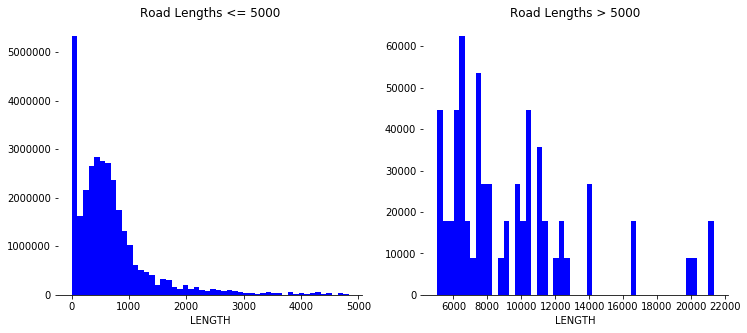

In [37]:
print('No of Unique Road Lengths: ',df.LENGTH.nunique())
print('Lengths:\n ',df.LENGTH.unique())
dfa=df[df.LENGTH<=5000]['LENGTH']
dfb=df[df.LENGTH>5000]['LENGTH']
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(dfa,kde=False, color='b',hist_kws={'alpha': 1});
plt.title('Road Lengths <= 5000')

plt.subplot(1,2,2)
sns.distplot(dfb,kde=False, color='b',hist_kws={'alpha': 1});
sns.despine(left=True)
plt.title('Road Lengths > 5000')

### Distribution of Sensor Counts

No of Unique Sensor Count Values:  785


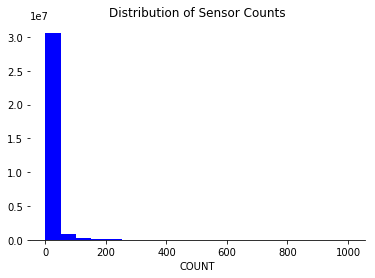

In [38]:
print('No of Unique Sensor Count Values: ',df.COUNT.nunique())
sns.distplot(df.COUNT, bins=20,kde=False, color='b',hist_kws={'alpha': 1});
plt.title('Distribution of Sensor Counts')
sns.despine(left=True)

No of Unique Confidence Values:  8


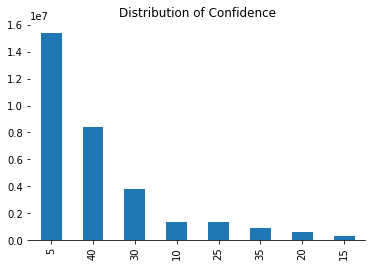

In [39]:
print('No of Unique Confidence Values: ',df.CONFIDENCE.nunique())
df['CONFIDENCE'].value_counts().plot(kind='bar')
plt.title('Distribution of Confidence')
sns.despine(left=True)

### Gap Fill Values

In [21]:
df['GAPFILL'].value_counts()

Y    17926176
N    14071776
Name: GAPFILL, dtype: int64

### Top & Bottom 10 TMC Codes by Mean Speed

In [ ]:
ss=df1.groupby('TMC').MEAN.agg(['count','max','mean'])
ss=ss.sort_values(by=['mean'],ascending=False)

In [ ]:
display_side_by_side(ss.head(10),ss.tail(10))

In [ ]:
ss1=df1.loc[df1['TMC'] == ss.index[0]]
ss2=ss1.resample('D', on='DateTime').mean()

In [ ]:
ss2.plot.line(y='MEAN')

In [ ]:
ss2.describe()
plt.figure(figsize=(12,7))
plt.subplot(2,1,1)

ss2.plot.line(y='MEAN')

plt.subplot(2,1,2)
plt.title('Original price1')
ss2.plot(y=["MEAN", "STDDEV", "MIN",'MAX','PCT-50','PCT-90'],
        figsize=(10,4));
ss2[['MEAN','STDDEV','MIN', 'MAX']].describe()

In [ ]:
print(ss2[['MEAN','STDDEV','MIN', 'MAX']].describe())

In [ ]:
ss2.columns